# This is Instructions for first assignment.

**Instructions**

- Write a Python code to implement Linear Regression for multi-dimensional input and one-dimensional output using Matrix Inverse. You can use NumPy to do matrix inverse, but you are encouraged to write your own code for this task also.

- Verify your results using the scikit-learn Linear Regression package.
(https://github.com/atmabodha/selfshiksha/blob/main/Supervised%20Learning%20Basics/SelfShiksha_SLB_MCQ_19_LinearRegression.ipynb)

- Write a code to minimise the squared error function using Gradient Descent, and compare the results with the above methods.

- Find the best fit hyperplane for the four synthetic datasets attached. Two of them will directly give good results with the usual Linear Regression algo, one of them will require a non-linear transformation of the input features, and for one of them the standard Linear Regression algo is not suitable. You need to figure out which of the 4 datasets belongs to which of these categories, with proper reasoning.

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

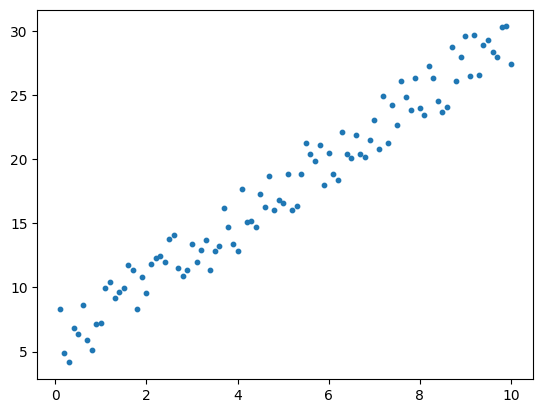

In [26]:
df = pd.read_csv("Data1.csv")
# df.head()
# df.columns[0]
# df.iloc[0]
# df=df.set_index(df.columns[0])

X = [float(item) for item in list(df['x'])]
Y = [float(item) for item in list(df['y'])]

plt.scatter(X, Y, s=10)  #s is marker size.
# plt.tick_params(left = False, bottom = False)
plt.show()


In [27]:
XY=[]
X_square=[]

for i in range(100):
  q = X[i] * Y[i]
  XY.append(q)

  p = X[i] ** 2
  X_square.append(p)

avg_XY = np.mean(XY)
avg_X = np.mean(X)
avg_Y = np.mean(Y)
avg_X_square = np.mean(X_square)

In [28]:
m = (avg_XY - avg_X * avg_Y)/(avg_X_square - avg_X ** 2)
c = (avg_Y - m * avg_X)
print("value of m :", m)
print("value of c :", c)

value of m : 2.384060066057183
value of c : 5.680787126761226


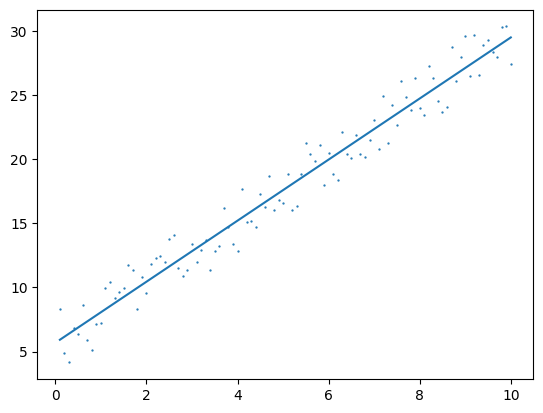

In [29]:
predicted_Y = []
for i in range(100):
  r = m * X[i] + c
  predicted_Y.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(X, Y, s=0.4, )
plt.plot(X, predicted_Y)

# Using Matrix Multiplication and Inverse

In [30]:
XY=[]
X_square=[]

for i in range(100):
  q = X[i] * Y[i]
  XY.append(q)

  p = X[i] ** 2
  X_square.append(p)

In [31]:
sigma_yi = sum(Y)
sigma_xiyi = sum(XY)

Vector_Y = np.array([sigma_yi, sigma_xiyi])
# New_B = [b1, b2]
Matrix_X = np.array([[len(X), sum(X)], [sum(X), sum(X_square)]])

# A_Transpose = np.transpose(A) or A.T #Here A should be np.array([[], [], []])
# New_X is a symmetrix matrix so It's transpose should be same as X.
Matrix_X_Transpose = Matrix_X

# Matrix multiplication :
# numpy.matmul(A, B) ; Here A, B need not be np.array, Simple 2-D list.
# A @ B @ C  ; Here A, B need to be np.array and First it will multiply (AXB) then (result X C).
Matrix_A = np.matmul(Matrix_X_Transpose, Matrix_X)

# Inverse of matrix A where A should not be singular.
Matrix_A_inverse = np.linalg.inv(Matrix_A)

result = np.matmul(np.matmul(Matrix_A_inverse, Matrix_X_Transpose), Vector_Y)

print("value of m :", result[1])
print("value of c :", result[0])

value of m : 2.38406006605736
value of c : 5.6807871267599115


**Verification with SKLearn Library**

Slope:  [[2.38406007]]
Intercept:  [5.68078713]


[]

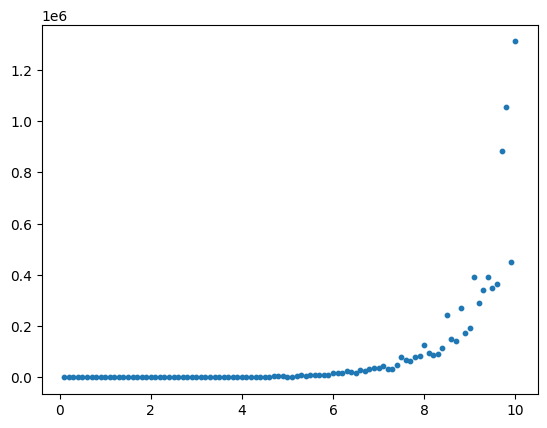

In [32]:
regr = LinearRegression()

x_array = np.array(X).reshape(-1, 1)
y_array = np.array(Y).reshape(-1, 1)

regr.fit(x_array,y_array)
print("Slope: ",regr.coef_)
print("Intercept: ",regr.intercept_)

y_d1_pred_array = regr.predict(x_array)

df = pd.read_csv("Data2.csv")
x_list = [float(i) for i in df["x"]]
y_list = [float(i) for i in df["y"]]

plt.scatter(x_list, y_list, s = 10)
plt.plot()